<a href="https://colab.research.google.com/github/tahoorak-s/Steganographer/blob/main/Steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 1. Install Pillow Library

In [ ]:
!pip install pillow

# 📌 2. Import Libraries

In [ ]:
from PIL import Image
from IPython.display import display
import io


# 📌 3. Upload Image (Lossless PNG)

In [ ]:
from google.colab import files

uploaded = files.upload()
for name in uploaded.keys():
    print(f"Uploaded file: {name}")


Saving images.png to images.png
Uploaded file: images.png


# 📌 4. Encode Message Function

In [ ]:
def encode_message(image_path, message, output_path):
    img = Image.open(image_path)
    binary_message = ''.join(format(ord(c), '08b') for c in message) + '1111111111111110'
    pixels = list(img.getdata())
    encoded_pixels = []
    data_index = 0

    for pixel in pixels:
        new_pixel = list(pixel)
        for i in range(3):  # Only RGB
            if data_index < len(binary_message):
                new_pixel[i] = (new_pixel[i] & ~1) | int(binary_message[data_index])
                data_index += 1
        encoded_pixels.append(tuple(new_pixel))

    img.putdata(encoded_pixels)
    img.save(output_path)
    print(f"✅ Message encoded and saved as: {output_path}")


# 📌 5. Decode Message Function

In [ ]:
def decode_message(image_path):
    img = Image.open(image_path)
    pixels = list(img.getdata())
    binary_message = ""

    for pixel in pixels:
        for i in range(3):
            binary_message += str(pixel[i] & 1)

    message = ""
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        if byte == '11111110':
            break
        message += chr(int(byte, 2))

    print("🔓 Hidden message:", message)


# 📌 6. Encode Your Secret Message

In [ ]:
encode_message("images.png", "This is hidden in the image!", "encoded_image.png")


✅ Message encoded and saved as: encoded_image.png


# 📌 7. Display Encoded Image

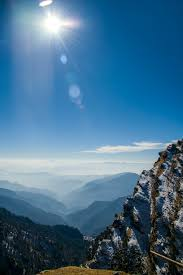

In [ ]:
encoded = Image.open("encoded_image.png")
display(encoded)


# 📌 8. Decode the Message from Encoded Image


In [ ]:
decode_message("encoded_image.png")


🔓 Hidden message: This is hidden in the image!ÿ


# 9. Download Encoded Image

In [ ]:
files.download("encoded_image.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>